In [1]:
import pandas as pd
import seaborn as sns

In [2]:
house_data=pd.read_csv("HousePricePrediction.csv")

In [3]:
house_data=house_data.dropna(subset=['SalePrice'])

house_data.drop(['Id'],
             axis=1,
             inplace=True)

house_data.tail()


,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0
1459,20,RL,9937,Inside,1Fam,6,1965,1965,HdBoard,290.0,1256.0,147500.0


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

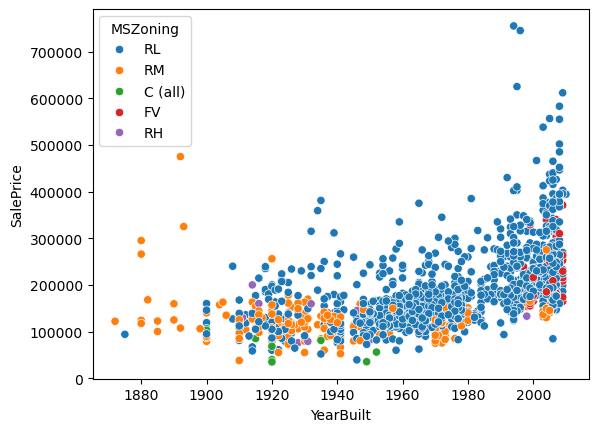

In [4]:
sns.scatterplot(x=house_data["YearBuilt"],y=house_data["SalePrice"],hue=house_data["MSZoning"])


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

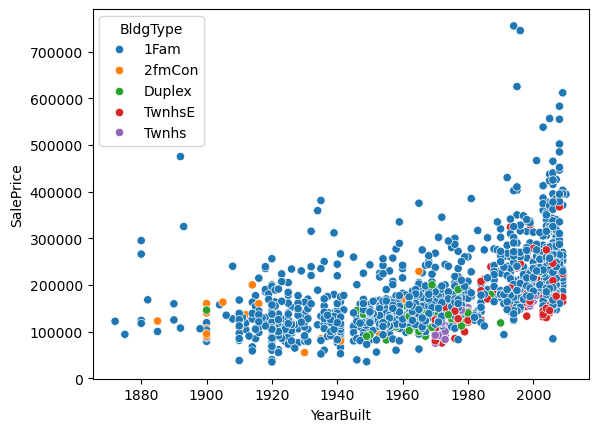

In [5]:
sns.scatterplot(x=house_data["YearBuilt"],y=house_data["SalePrice"],hue=house_data["BldgType"])


In [6]:

cols = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
house_data = pd.get_dummies(house_data, columns=cols, drop_first=True)
house_data.tail()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
1455,60,7917,5,1999,2000,0.0,953.0,175000.0,False,False,...,False,False,False,False,False,False,False,True,False,False
1456,20,13175,6,1978,1988,163.0,1542.0,210000.0,False,False,...,False,False,False,False,True,False,False,False,False,False
1457,70,9042,9,1941,2006,0.0,1152.0,266500.0,False,False,...,True,False,False,False,False,False,False,False,False,False
1458,20,9717,6,1950,1996,1029.0,1078.0,142125.0,False,False,...,False,False,False,True,False,False,False,False,False,False
1459,20,9937,6,1965,1965,290.0,1256.0,147500.0,False,False,...,False,True,False,False,False,False,False,False,False,False


In [7]:
X=house_data.drop(columns=["SalePrice"])
y=house_data["SalePrice"] 


In [8]:
# split into two parts

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [9]:
# train our model

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=model.predict(X_test)


In [11]:
# EVALUATE
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)
print(r2)

0.619513179654482
